In [34]:
import numpy as np
from hmmlearn.hmm import CategoricalHMM

In [35]:
states=['s1','s2','s3']
obs_map=['v1','v2','v3']


In [36]:
pi=np.array([0.5,0.3,0.2])

tm=np.array([[0.1, 0.6, 0.3],
             [0.5, 0.3, 0.2],
             [0.6, 0.3, 0.1]])
em= np.array([[0.3, 0.5, 0.2],
              [0.6, 0.2, 0.2],
              [0.2,0.6,0.2]])  # Emission matrix
obs=np.array([[2],[1],[0]])

obs_labels=[obs_map[i[0]] for i in obs]

n_states=len(states)
n_obs=len(obs_map)

In [37]:
model=CategoricalHMM(n_components=n_states, n_features=n_obs,n_iter=0)
model.startprob_=pi
model.transmat_=tm
model.emissionprob_=em

In [38]:
print("Observations:",obs_labels)

Observations: ['v3', 'v2', 'v1']


In [39]:
log_lik=model.score(obs)
likelihood=np.exp(log_lik)
print("forward likelihood:",likelihood)
print("log likelihood:",log_lik)


forward likelihood: 0.03154799999999999
log likelihood: -3.456245083446393


In [40]:
log_vit, vit_path=model.decode(obs,algorithm='viterbi')
vit_states=[states[i] for i in vit_path]
vit_prob=np.exp(log_vit)

print("Best path:",vit_states)
print("probability:",vit_prob)

Best path: ['s2', 's1', 's2']
probability: 0.005400000000000001


In [41]:
post_probs=model.predict_proba(obs)
print("posterior:",post_probs)

posterior: [[0.42887029 0.34290605 0.22822366]
 [0.45644732 0.21110688 0.3324458 ]
 [0.27348802 0.62533283 0.10117916]]


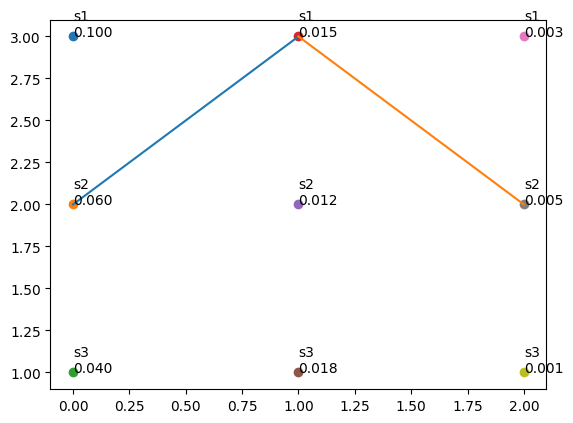

In [50]:
T=len(obs)

delta=np.zeros((T,n_states))
delta[0]=pi*em[:,obs[0][0]]
for t in range(1,T):
    for j in range(n_states):
        delta[t,j]=np.max(delta[t-1]*tm[:,j])*em[j, obs[t][0]]

plt.figure()
for t in range(T):
    for s, state in enumerate(states):
        y=len(states)-s
        plt.scatter(t,y)
        plt.text(t,y, f"{state}\n{delta[t][s]:.3f}")

for t in range(1,T):
    y1=len(states)-vit_path[t-1]
    y2=len(states)-vit_path[t]
    plt.plot([t-1,t], [y1,y2])

plt.show()


